<a href="https://colab.research.google.com/github/dustin-py/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.



---



# 1. Load and clean the data (or determine the best method to drop observations when running tests)

In [91]:
# Import external libraries:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp

# Load in csv file of house votes from '84:
house_votes = pd.read_csv('house-votes-84.data', header=None, na_values='?')

# Check to see if the data loades with the frist 5 rows:
# display(house_votes.head())

# View the shape of our data to see if it matches the original data repo:
# print(house_votes.shape)

# Open the names document to get the attribute names
with open('house-votes-84.names','r') as file:
    names_file = file.read()
    # print(names_file)

# Create a list of Attribute names to use as columns:
cols = ['party','handicap-infants','water-project-cost-sharing',
        'adoption-of-the-budget-resolution','physician-fee-freeze',
        'el-salvador-aid','religious-groups-in-schools',
        'anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile',
        'immigration','synfuels-corporation','education-spending',
        'superfund-right-to-sue','crime','duty-free-exports',
        'export-administration-act-south-africa']

# Apply cols list to our data frame:
house_votes.columns = cols

# View the first five rows to confirm the change was saved:
# house_votes.head()

# Here we will map our yes and no values:
house_votes = house_votes.replace({'y':1,'n':0})

# Now I want to create a group for republicans and a group ro democrats:
republicans = house_votes[house_votes['party']=='republican']
democrats = house_votes[house_votes['party']=='democrat']

# Display the groupped DataFrames to make sure it worked:
display(republicans.head(10))
display(democrats.head(10))

,party,handicap-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
11,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,NaN
14,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN
15,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,0.0,NaN
18,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0
28,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


,party,handicap-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
12,democrat,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
13,democrat,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.0,1.0,NaN
16,democrat,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,NaN,0.0,0.0,1.0
17,democrat,1.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [0]:
# Function to remove nans from columns
def removeNan(df,col_name=[]):
    '''Function to remove nans from dataframe columns'''
    col = df[col_name]
    np.isnan(col)
    return col[~np.isnan(col)]

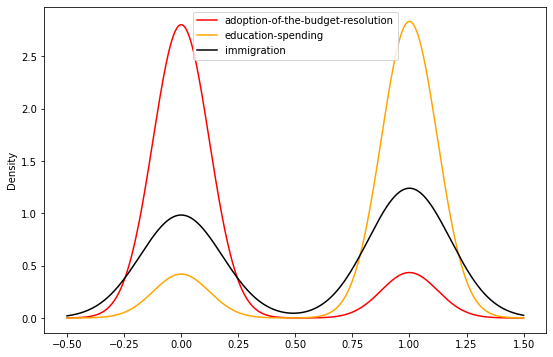

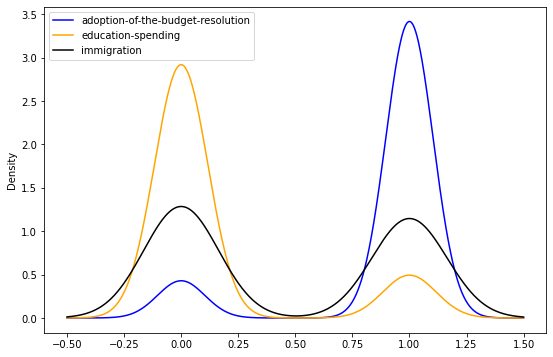

In [93]:
# Further Cleaning and Exploring:
# Remove NaN values from adoption-of-the-budget-resolution column:
republicans_no_nans = removeNan(republicans,['adoption-of-the-budget-resolution','education-spending','immigration'])
democrats_no_nans = removeNan(democrats,['adoption-of-the-budget-resolution','education-spending','immigration'])

# Simple visual.
republicans_no_nans.plot(kind='density',color=['red','orange','black'],figsize=(9,6)); # Red
democrats_no_nans.plot(kind='density',color=['blue','orange','black'],figsize=(9,6)); # Blue

# 2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01

In [95]:
# State NULL Hypothesis:
print("NULL HYPOTHESIS:",
      "\nThere is no difference in voting averages between republicans and",
      "democrats on adoption of the budget resolutionis.")
print("\nALT HYPOTHESIS:",
      "\nDemocrats are more likely to vote 'yes' on the topic of adoption of the budget resolution than Republicans.")

# Run our ttest to compare the means of yes in our two groups.
print("\nIndependent T-test results:")
ttest1 = ttest_ind(democrats['adoption-of-the-budget-resolution'],
          republicans['adoption-of-the-budget-resolution'],
          nan_policy='omit')
print(ttest1)

# Check to confirm pvalue is < 0.01
if ttest1.pvalue < 0.01:
    print("\nThe pvalue is less than 0.01")

NULL HYPOTHESIS: 
There is no difference in voting averages between republicans and democrats on adoption of the budget resolutionis.

ALT HYPOTHESIS: 
Democrats are more likely to vote 'yes' on the topic of adoption of the budget resolution than Republicans.

Independent T-test results:
Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)

The pvalue is less than 0.01


# 3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

In [96]:
#@title Default title text
# State NULL Hypothesis:
print("NULL HYPOTHESIS:",
      "\nThere is no difference in voting averages between republicans and",
      "democrats on education.")
# State ALT Hypothesis:
print("\nALT HYPOTHESIS:",
      "\nRepublicans are more likely to vote 'yes' on the topic of education spending than Democrats.")

# Run our ttest to compare the means of yes in our two groups.
print("\nIndependent T-test results:")
ttest2 = ttest_ind(republicans['education-spending'],
          democrats['education-spending'],
          nan_policy='omit')
print(ttest2)

# Check to confirm pvalue is > 0.01
if ttest2.pvalue < 0.01:
    print("\nThe pvalue is less than 0.01")

NULL HYPOTHESIS: 
There is no difference in voting averages between republicans and democrats on education.

ALT HYPOTHESIS: 
Republicans are more likely to vote 'yes' on the topic of education spending than Democrats.

Independent T-test results:
Ttest_indResult(statistic=20.500685724563073, pvalue=1.8834203990450192e-64)

The pvalue is less than 0.01


# 4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

In [87]:
# State NULL Hypothesis:
print("NULL HYPOTHESIS:",
      "\nThere is no difference in voting averages between republicans and",
      "democrats on immigration.")
# State ALT Hypothesis:
print("\nALT HYPOTHESIS:",
      "\nRepublicans are more likely to vote 'yes' on the topic of immigration than Democrats.")

# Run our ttest to compare the means of yes in our two groups.
print("\nIndependent T-test results:")
ttest3 = ttest_ind(republicans['immigration'],
          democrats['immigration'],
          nan_policy='omit')
ttest3
if ttest3.pvalue > 0.01:
    print("\nThe pvalue is greater than 0.01")

NULL HYPOTHESIS: 
There is no difference in voting averages between republicans and democrats on immigration.

ALT HYPOTHESIS: 
Republicans are more likely to vote 'yes' on the topic of immigration than Democrats.

Independent T-test results:


Ttest_indResult(statistic=1.7359117329695164, pvalue=0.08330248490425066)

## Stretch Goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then check your Answers using Scipy!